<a href="https://colab.research.google.com/github/stephanie0620/DeepGenerativeModels/blob/main/WEEK1_CNN_%26_DNN_%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **使用DNN**

In [ ]:
"""
使用DNN
"""

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten

# 載入資料集並預處理
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 構建DNN模型
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 評估模型
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss: ", loss)
print(f"Test accuracy: {accuracy * 100:.2f}%")
predictions = model.predict(x_test)

Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.3132 - accuracy: 0.9110 - val_loss: 0.1680 - val_accuracy: 0.9511
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1318 - accuracy: 0.9608 - val_loss: 0.1244 - val_accuracy: 0.9638
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0904 - accuracy: 0.9729 - val_loss: 0.0958 - val_accuracy: 0.9707
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.1021 - val_accuracy: 0.9703
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0954 - val_accuracy: 0.9719
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.1004 - val_accuracy: 0.9710
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.1018 - val_accuracy: 0.9737
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

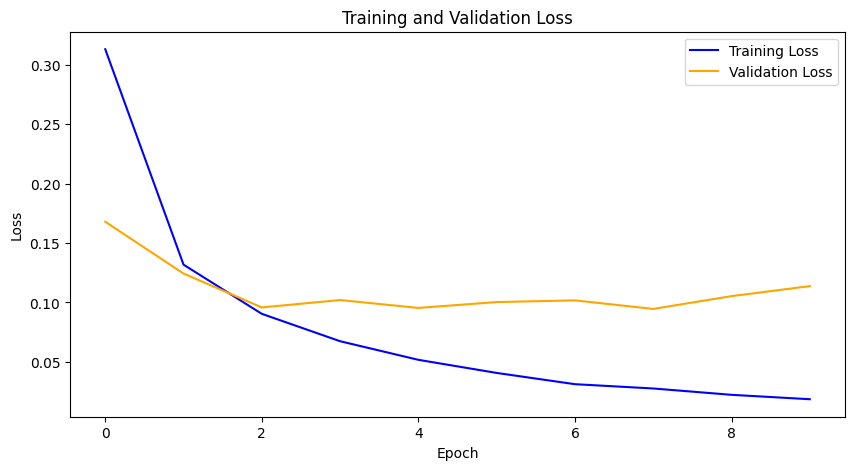

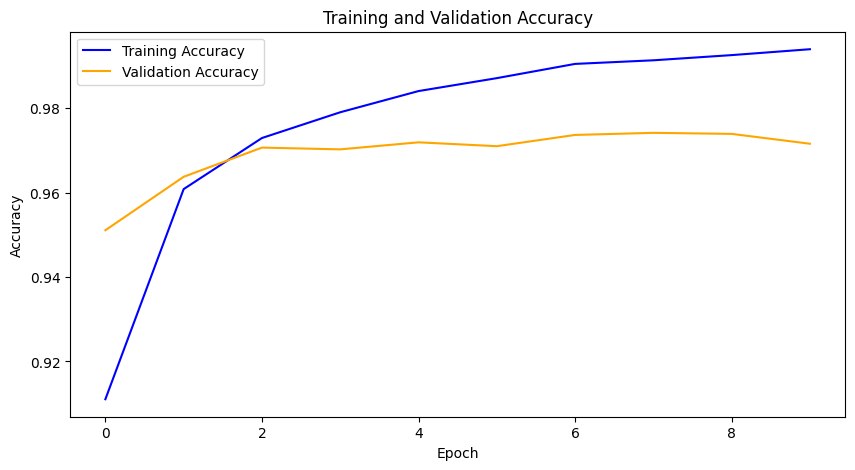

In [ ]:
import matplotlib.pyplot as plt

# 可視化訓練過程
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10,5))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show

plt.figure(figsize=(10,5))
plt.plot(accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show

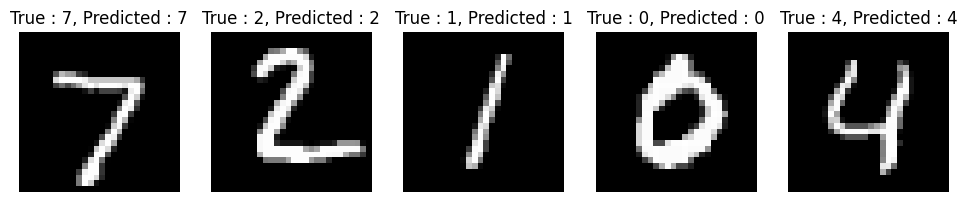

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

predicted_labels = np.argmax(predictions, axis=1)

def show_samples(images, labels, predictions):
  plt.figure(figsize=(12,6))
  for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"True : {labels[i]}, Predicted : {predictions[i]}")
    plt.axis('off')
  plt.show()


sample_images = X_test[:5]
sample_labels = y_test[:5]

show_samples(sample_images, sample_labels, predicted_labels)

## **使用CNN**

In [ ]:
"""
使用CNN
"""
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 載入資料集並預處理
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 構建CNN模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 評估模型
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss: ", loss)
print(f"Test accuracy: {accuracy * 100:.2f}%")
predictions = model.predict(x_test)

Epoch 1/10
750/750 [==============================] - 7s 5ms/step - loss: 0.1832 - accuracy: 0.9447 - val_loss: 0.0915 - val_accuracy: 0.9718
Epoch 2/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0466 - val_accuracy: 0.9861
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0419 - val_accuracy: 0.9882
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0356 - val_accuracy: 0.9899
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0391 - val_accuracy: 0.9889
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0372 - val_accuracy: 0.9900
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

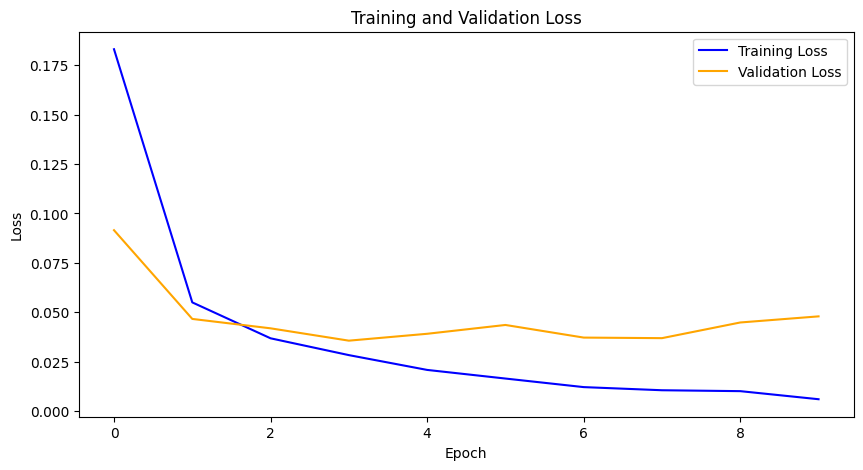

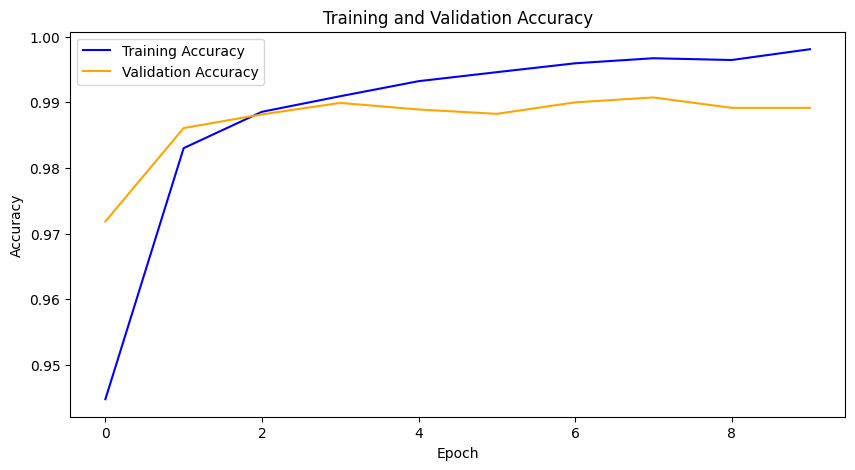

In [ ]:
import matplotlib.pyplot as plt

# 可視化訓練過程
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10,5))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show

plt.figure(figsize=(10,5))
plt.plot(accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show

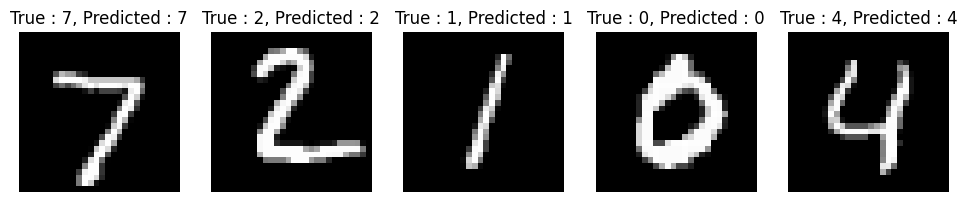

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

predicted_labels = np.argmax(predictions, axis=1)

def show_samples(images, labels, predictions):
  plt.figure(figsize=(12,6))
  for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"True : {labels[i]}, Predicted : {predictions[i]}")
    plt.axis('off')
  plt.show()


sample_images = X_test[:5]
sample_labels = y_test[:5]

show_samples(sample_images, sample_labels, predicted_labels)